In [1]:
import pandas as pd

data = pd.read_csv("tested.csv")

print(data.head())

   PassengerId  Survived  Pclass  \
0          892         0       3   
1          893         1       3   
2          894         0       2   
3          895         0       3   
4          896         1       3   

                                           Name     Sex   Age  SibSp  Parch  \
0                              Kelly, Mr. James    male  34.5      0      0   
1              Wilkes, Mrs. James (Ellen Needs)  female  47.0      1      0   
2                     Myles, Mr. Thomas Francis    male  62.0      0      0   
3                              Wirz, Mr. Albert    male  27.0      0      0   
4  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female  22.0      1      1   

    Ticket     Fare Cabin Embarked  
0   330911   7.8292   NaN        Q  
1   363272   7.0000   NaN        S  
2   240276   9.6875   NaN        Q  
3   315154   8.6625   NaN        S  
4  3101298  12.2875   NaN        S  


# Handling Missing Values.

In [4]:
print(data.isnull().sum())

data['Age'].fillna(data['Age'].median(), inplace=True)

data.dropna(subset=['Embarked'],inplace=True)

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


C:\Users\Yegneswar\AppData\Local\Temp\ipykernel_10264\191918745.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Age'].fillna(data['Age'].median(), inplace=True)


# Encoding Categorical Variables

In [7]:
data = pd.get_dummies(data,columns=['Embarked', 'Sex'],drop_first=True)

# Normalizing the numeric features like 'Age' ,'Fare' to bring them to a similar scale

In [10]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
data[['Age' , 'Fare']] = scaler.fit_transform(data[['Age', 'Fare']])

In [23]:
# Split the data

from sklearn.model_selection import train_test_split

X = data.drop('Survived', axis=1)
y = data['Survived']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 42)
print(X_train.dtypes)

PassengerId      int64
Pclass           int64
Name            object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked_Q        bool
Embarked_S        bool
Sex_male          bool
dtype: object


In [25]:
# Identify columns with non-numeric data
non_numeric_columns = X_train.select_dtypes(include=['object']).columns

# Apply one-hot encoding to these columns
X_train = pd.get_dummies(X_train, columns=non_numeric_columns, drop_first=True)
X_test = pd.get_dummies(X_test, columns=non_numeric_columns, drop_first=True)

# Align columns in training and testing sets (to handle mismatch after encoding)
X_train, X_test = X_train.align(X_test, join='left', axis=1)



In [27]:
X_train.fillna(0, inplace=True)
X_test.fillna(0, inplace=True)


# Evaluate the Model

Accuracy (%): 100
Precision (%): 100
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       1.00      1.00      1.00        34

    accuracy                           1.00        84
   macro avg       1.00      1.00      1.00        84
weighted avg       1.00      1.00      1.00        84

Confusion Matrix:
 [[50  0]
 [ 0 34]]


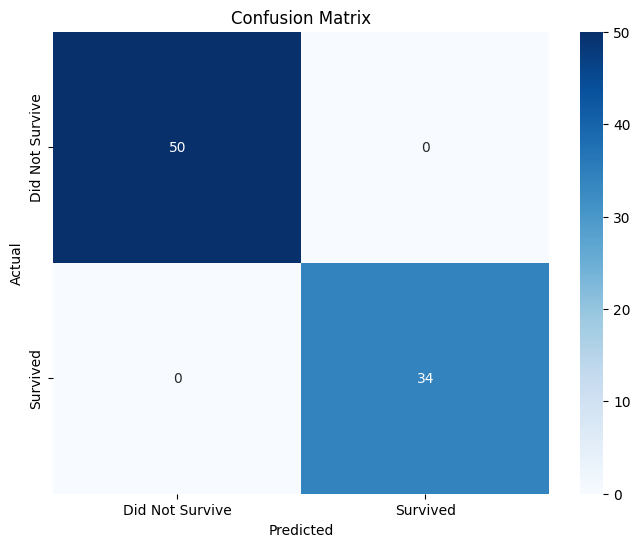

In [31]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, precision_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Train the Random Forest model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = int(accuracy_score(y_test, y_pred) * 100)  # Convert to percentage and integer
precision = int(precision_score(y_test, y_pred, average='binary') * 100)  # Convert to percentage and integer
print('Accuracy (%):', accuracy)
print('Precision (%):', precision)
print('Classification Report:\n', classification_report(y_test, y_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:\n', conf_matrix)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Did Not Survive', 'Survived'], yticklabels=['Did Not Survive', 'Survived'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()
